## TITULO
aqui va un titulo y descripción con información, por ahora solo coloco nombres:

- Jesús David Petro Ramos
- David Josue Ruiz Morales

In [1]:
#librerias a importar
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

rpath_data = '../data/'
rpath_trans = '../data/csv/'
rpath_data_trans = '../data/data_transient'

# aqui va texto

In [2]:
#leemeos las datas

#data de transientes:
transient_data = pd.read_csv('../data/transient_lightcurves.csv')
transient_data

,ID,observation_id,Mag,Magerr,MJD
0,TranID1409030010044114444,0,18.8765,0.166417,53766.089871
1,TranID1409030010044114444,1,20.0519,0.281733,53990.458866
2,TranID1409030010044114444,2,20.2199,0.295764,53996.286004
3,TranID1409030010044114444,3,21.1192,0.495390,54385.205789
4,TranID1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,TranID1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,TranID1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,TranID1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,TranID1209190181234125108,451472,18.3150,0.128915,56205.292631


In [3]:
#data de lectura (labels)
transient_label = pd.read_csv('../data/transient_labels.csv')
transient_label


,Classification,TransientID
0,Flare,1611101400424116462
1,HPM,1611101210274176502
2,HPM,1611101150154137989
3,HPM,1611091630244128695
4,CV,1611091600294129774
...,...,...
5534,SN,711020040154124879
5535,SN,711020040154110403
5536,SN/TDE,711020040064121985
5537,SN,711011210104109439


In [4]:
transient_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440469 entries, 0 to 440468
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ID              440469 non-null  object 
 1   observation_id  440469 non-null  int64  
 2   Mag             440469 non-null  float64
 3   Magerr          440469 non-null  float64
 4   MJD             440469 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 16.8+ MB


In [5]:
transient_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  5539 non-null   object
 1   TransientID     5539 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 86.7+ KB


# aqui va texto

In [6]:
#quitamos el "TanID" del csv "transient label" para despues poder concatenar
transient_data['ID'] = transient_data['ID'].str.replace('TranID', '').astype(str)
transient_data

,ID,observation_id,Mag,Magerr,MJD
0,1409030010044114444,0,18.8765,0.166417,53766.089871
1,1409030010044114444,1,20.0519,0.281733,53990.458866
2,1409030010044114444,2,20.2199,0.295764,53996.286004
3,1409030010044114444,3,21.1192,0.495390,54385.205789
4,1409030010044114444,4,19.3289,0.195002,54355.282285
...,...,...,...,...,...
440464,1209190181234125108,451469,18.1952,0.123607,56189.314816
440465,1209190181234125108,451470,18.2097,0.124706,56189.322996
440466,1209190181234125108,451471,18.5116,0.138816,56205.285887
440467,1209190181234125108,451472,18.3150,0.128915,56205.292631


In [7]:
transient_label['TransientID'] = transient_label['TransientID'].astype(str)
transient_label = transient_label.rename(columns = {'Classification':'Classification', 'TransientID':'ID'})
transient_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5539 entries, 0 to 5538
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Classification  5539 non-null   object
 1   ID              5539 non-null   object
dtypes: object(2)
memory usage: 86.7+ KB


# concat

In [24]:
transient_merge_data = pd.merge(transient_label, transient_data, on ='ID', how= 'inner')
transient_merge_data

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Flare,1611101400424116462,172281,18.9536,0.165724,53711.407549
1,Flare,1611101400424116462,172282,18.7073,0.149148,53711.414964
2,Flare,1611101400424116462,172283,18.8383,0.157589,53711.422389
3,Flare,1611101400424116462,172284,18.8344,0.157162,53711.429801
4,Flare,1611101400424116462,172285,18.7240,0.149275,53734.378142
...,...,...,...,...,...,...
440464,SN,703201120684101938,237943,21.1999,0.528927,54917.321417
440465,SN,703201120684101938,237944,20.0148,0.278655,55988.342426
440466,SN,703201120684101938,237945,20.6680,0.401302,56015.303520
440467,SN,703201120684101938,237946,19.5785,0.225990,56029.224570


In [9]:
transient_merge_data['ID'].value_counts()

ID
1502081400484121702    564
1304111230414140313    524
801301180474127786     523
803051320384107064     519
1104041230404151904    517
                      ... 
1609030041244102873      1
711091151214121650       1
1611091120214135441      1
711011210104109439       1
1611091600294129774      1
Name: count, Length: 4869, dtype: int64

# aqui va texto

In [35]:
#filtramos ID con mayor a 300 muestras
transient_merge_filtered = transient_merge_data[transient_merge_data['ID'].isin(transient_merge_data['ID'].value_counts()[transient_merge_data['ID'].value_counts() >= 300].index)]
transient_merge_filtered['ID'].value_counts()

ID
1502081400484121702    564
1304111230414140313    524
801301180474127786     523
803051320384107064     519
1204111210464120236    517
                      ... 
1303011350574103320    300
1211131320034233281    300
1112310010184138365    300
1205231210814118357    300
1209171260074119171    300
Name: count, Length: 395, dtype: int64

In [36]:
transient_merge_filtered

,Classification,ID,observation_id,Mag,Magerr,MJD
0,Flare,1611101400424116462,172281,18.9536,0.165724,53711.407549
1,Flare,1611101400424116462,172282,18.7073,0.149148,53711.414964
2,Flare,1611101400424116462,172283,18.8383,0.157589,53711.422389
3,Flare,1611101400424116462,172284,18.8344,0.157162,53711.429801
4,Flare,1611101400424116462,172285,18.7240,0.149275,53734.378142
...,...,...,...,...,...,...
440044,CV,711081290154130838,59043,18.8871,0.173798,56581.308865
440045,CV,711081290154130838,59044,18.9361,0.181661,56589.363189
440046,CV,711081290154130838,59045,19.2549,0.209467,56589.369277
440047,CV,711081290154130838,59046,18.5029,0.148715,56589.375370


# aqui va texto

In [37]:
transient_merge_filtered = transient_merge_filtered.sort_values(by = ['Classification','ID','MJD'])
transient_merge_filtered

,Classification,ID,observation_id,Mag,Magerr,MJD
339180,AGN,1004051040704109194,235974,18.4922,0.169940,53464.337620
339181,AGN,1004051040704109194,235975,18.3785,0.161408,53464.345736
339182,AGN,1004051040704109194,235976,18.7037,0.187554,53464.353807
339183,AGN,1004051040704109194,235977,18.8062,0.196977,53464.361852
339200,AGN,1004051040704109194,235994,18.9661,0.165796,53498.241454
...,...,...,...,...,...,...
71517,YSO?,1410011230234143194,402122,18.3510,0.156437,56581.484319
71592,YSO?,1410011230234143194,402197,18.1235,0.141711,56590.346570
71459,YSO?,1410011230234143194,402064,18.3172,0.153627,56590.356078
71386,YSO?,1410011230234143194,401991,18.5026,0.167991,56590.365581


# aqui va texto

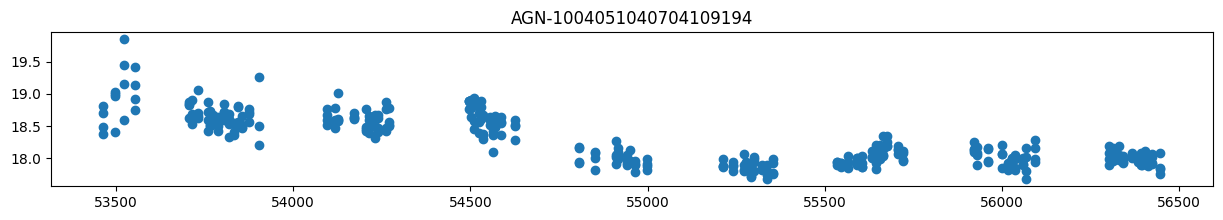

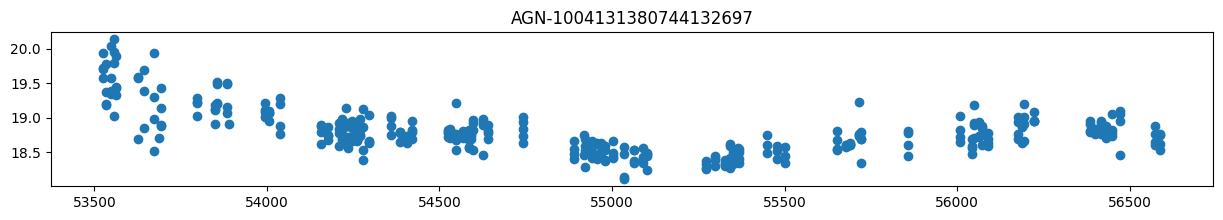

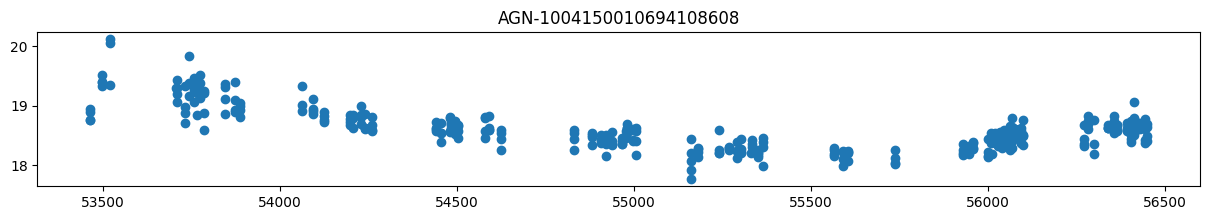

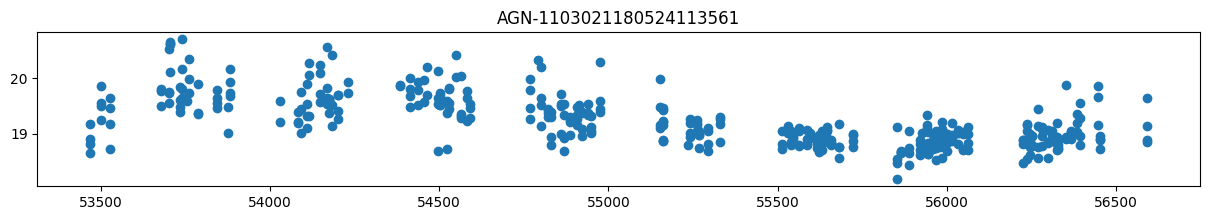

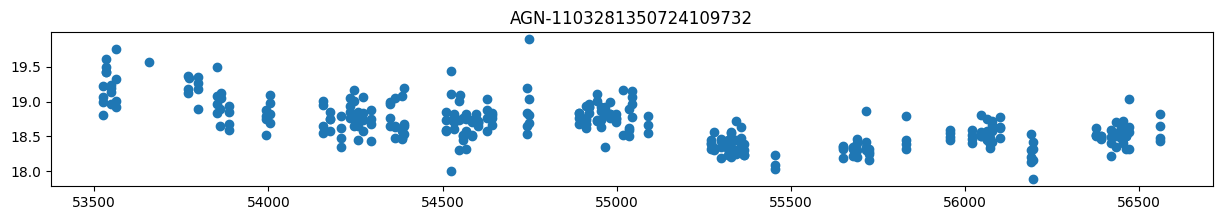

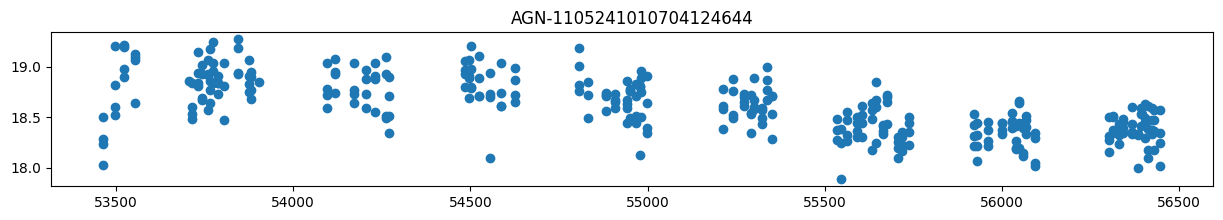

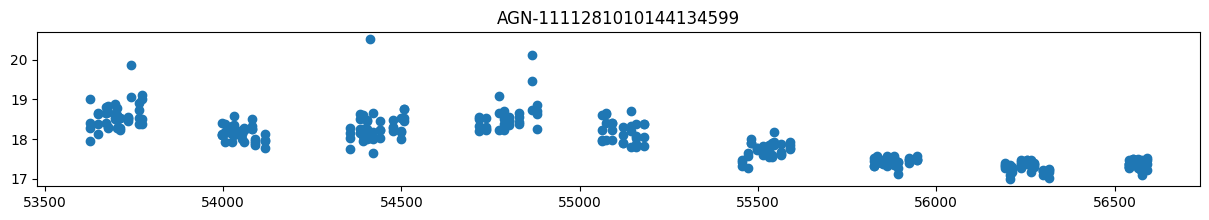

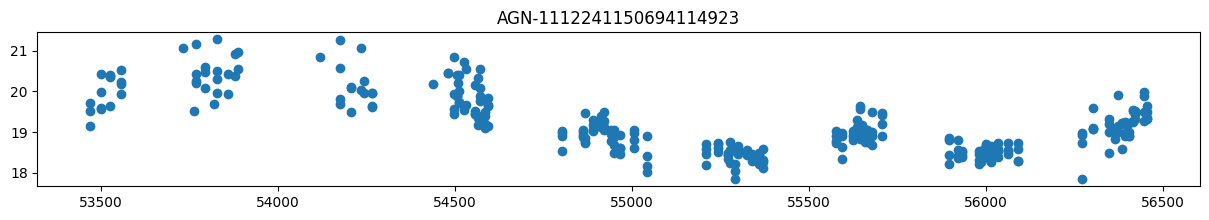

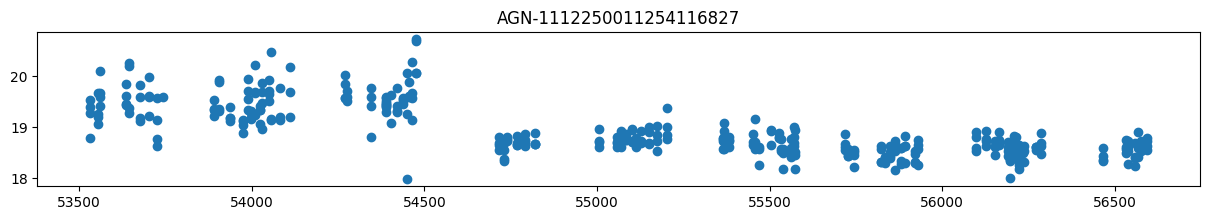

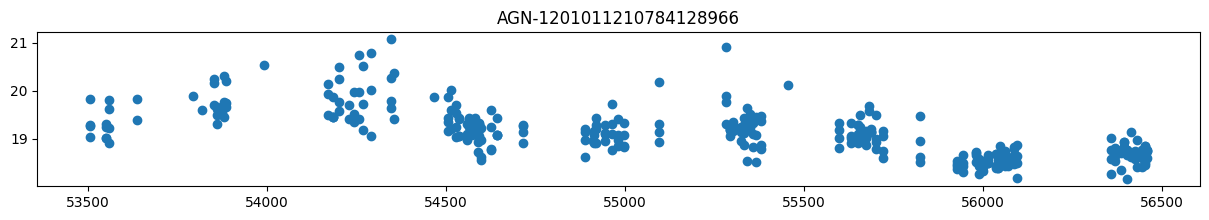

In [38]:
#graficamos una parte

counter = 0

for i in (transient_merge_filtered['ID'].unique()):
    counter += 1
    var = transient_merge_filtered[transient_merge_filtered['ID'] == i]

    plt.figure(figsize = (15,2))
    plt.title('{}-{}'.format(var['Classification'].iloc[0],i))
    plt.scatter(var['MJD'], var['Mag'])

    if counter == 10: break

# aqui va texto

In [ ]:
classification = transient_merge_filtered['Classification'].unique()

if not os.path.exists(rpath_trans):
    os.makedirs(rpath_trans)

for classification in classification:
    
    df_classification = transient_merge_filtered[transient_merge_filtered['Classification'] == classification]
    name = f'{classification}.csv'
    file_name = os.path.join(rpath_trans, name.replace('\\','').replace('/','').replace('?','NN'))
    df_classification.to_csv(file_name, index = False)

    print(f'{name}: {file_name}')

# xx

In [14]:
interval = [[0.792, 1.416],[0.777, 1.413],[0.763, 1.412],[0.789, 1.369],[0.767, 1.406],[0.766, 1.447],[0.77, 1.393],[0.743, 1.425]]

In [26]:
# Lista de tipos de transientes a analizar
from transient_analysis import TransientDataLoader
from transient_analysis import VisibilityGraphAnalyzer


In [21]:
transient_types = ['AGN', 'Blazar', 'CV', 'Flare', 'HPM', 'LPV', 'SN', 'Var']
loader_transient = {transient_type: [] for transient_type in transient_types}
x_interval = {transient_types[i]: interval[i] for i in range(len(transient_types))}
alpha_values = {transient_type: [] for transient_type in transient_types}

{'AGN': [0.792, 1.416], 'Blazar': [0.777, 1.413], 'CV': [0.763, 1.412], 'Flare': [0.789, 1.369], 'HPM': [0.767, 1.406], 'LPV': [0.766, 1.447], 'SN': [0.77, 1.393], 'Var': [0.743, 1.425]}


In [ ]:
#cargamos todos los loader_transients

for transient_type in transient_types:
    loader = TransientDataLoader(type = transient_type)
    loader_transient[transient_type] = loader
    print(f'Datos cargados para {transient_type}')

In [ ]:
for transient_type in transient_types:
    loader_transient[transient_type].edgeList()

In [18]:
print(loader_transient)

{'AGN': <transient_analysis.TransientDataLoader object at 0x0000028732B73890>, 'Blazar': <transient_analysis.TransientDataLoader object at 0x000002877EDCA1E0>, 'CV': <transient_analysis.TransientDataLoader object at 0x0000028733812720>, 'Flare': <transient_analysis.TransientDataLoader object at 0x0000028732F3A600>, 'HPM': <transient_analysis.TransientDataLoader object at 0x0000028732FE2480>, 'LPV': <transient_analysis.TransientDataLoader object at 0x000002877EC93530>, 'SN': <transient_analysis.TransientDataLoader object at 0x000002877D442840>, 'Var': <transient_analysis.TransientDataLoader object at 0x000002877D6563C0>}


../data/transient/AGN/edgeList/


In [ ]:
from transient_analysis import VisibilityGraphAnalyzer
lista_aux = []

for index, transient_type in enumerate(transient_types): 
    
    loader = loader_transient[transient_type] #analizamos cada transiente por ciclo
    ids = loader.transient['ID'].unique() #sacamos los id's unicos para evitar que se repitan.

    li_fit = x_interval[transient_type][0]
    ls_fit = x_interval[transient_type][1]
    graph_analyzer = VisibilityGraphAnalyzer(type = transient_type, li_fit=li_fit, ls_fit=ls_fit)
    
    for trans_id in ids:
        x = graph_analyzer.get_alpha(edgePath=loader._edgePath, id = trans_id, name = transient_type)
        print(x)

    print(graph_analyzer.values)
    break


In [ ]:
# 

# alpha_values = {transient_type: [] for transient_type in transient_types}
for transient_type in transient_types: 
    loader = loader_transient[transient_type]
    ids = loader.transient['ID'].unique()
    graph_analyzer = VisibilityGraphAnalyzer(type = transient_type)

    for trans_id in ids:
        x = graph_analyzer.get_alpha(edgePath=loader._edgePath, id = trans_id, name= transient_type)
        print(x)


# for transient_type in transient_types: 
#     loader = TransientDataLoader(type = transient_type)
#     ids = loader.transient['ID'].unique()
    

#     for trans_id in ids: 
#         print(f'Procesando ID {trans_id} para {transient_type}')
#         graph_analyzer = VisibilityGraphAnalyzer(type = transient_type)

#         pass